Introduction

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import micropip
await micropip.install("seaborn")
import seaborn as sns

In [5]:
data = pd.read_csv('tested.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 31.1+ KB


In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
data.dropna(subset=['Fare'], inplace=True)

In [13]:
P1_age_median = data.loc[data['Pclass'] == 1, 'Age'].median()
P2_age_median = data.loc[data['Pclass'] == 2, 'Age'].median()
P3_age_median = data.loc[data['Pclass'] == 3, 'Age'].median()


In [16]:
data.loc[(data["Pclass"] == 1) & (data["Age"].isna()), "Age"] = P1_age_median
data.loc[(data["Pclass"] == 2) & (data["Age"].isna()), "Age"] = P2_age_median
data.loc[(data["Pclass"] == 3) & (data["Age"].isna()), "Age"] = P3_age_median


In [17]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          326
Embarked         0
dtype: int64

In [23]:
data = data.drop(columns='Cabin')

In [24]:
data['Age'] = data['Age'].round().astype(int)


In [25]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14,0,0,7538,9.2250,S
6,898,1,3,"Connolly, Miss. Kate",female,30,0,0,330972,7.6292,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26,1,1,248738,29.0000,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18,0,0,2657,7.2292,C
9,901,0,3,"Davies, Mr. John Samuel",male,21,2,0,A/4 48871,24.1500,S


In [26]:
data['Fare'] = data['Fare'].round(2)

In [28]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34,0,0,330911,7.83,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.00,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.69,Q
3,895,0,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.66,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.29,S


In [33]:
print(data['Age'].mean())

29.304556354916066


In [35]:
grouped_means = data.groupby('Survived')[['Age', 'Fare', 'Pclass']].mean()
print(grouped_means)

    

    

                Age       Fare    Pclass
Survived                                
0         29.200000  27.528075  2.332075
1         29.486842  49.747763  2.144737


In [14]:
data.to_csv('clean_titanic')

In [42]:
gender_summary = data.groupby('Sex')['Survived'].agg(['sum', 'count', 'mean'])
print(gender_summary)


        sum  count  mean
Sex                     
female  152    152   1.0
male      0    265   0.0


(array([ 16.,  16.,  71., 174.,  40.,  49.,  25.,  16.,   9.,   1.]),
 array([ 0. ,  7.6, 15.2, 22.8, 30.4, 38. , 45.6, 53.2, 60.8, 68.4, 76. ]),
 <BarContainer object of 10 artists>)

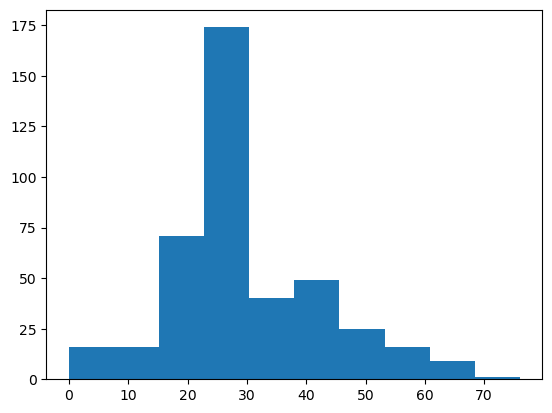

In [49]:
plt.hist(data['Age'])

Plots saved: titanic_age_kde.png and titanic_male_age_kde.png
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  
<class 'pandas.core.fram

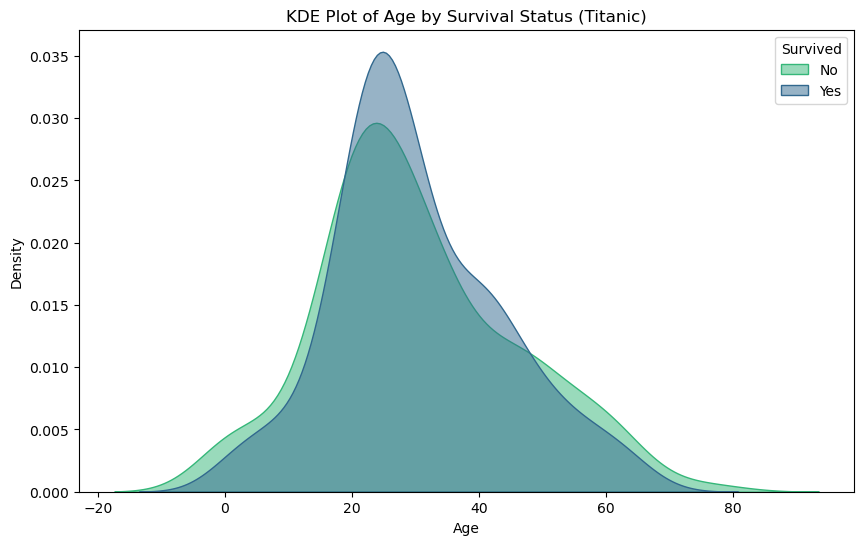

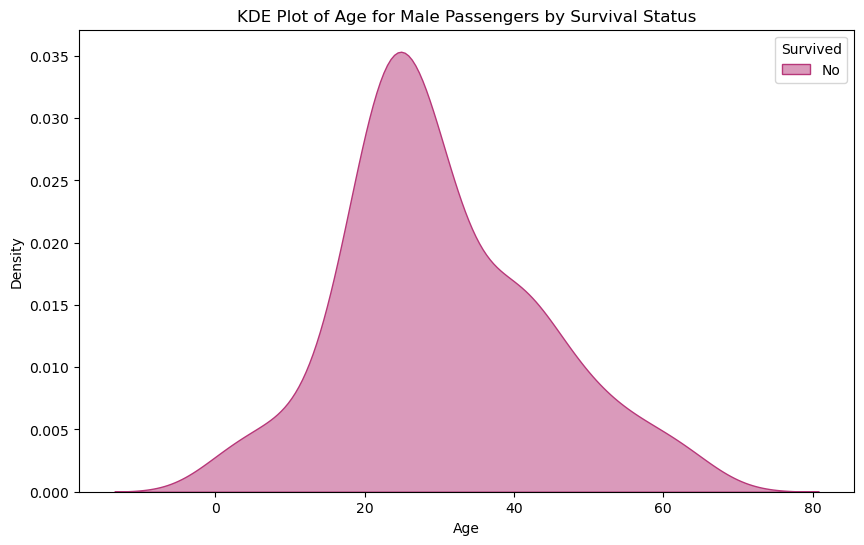

In [10]:

    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=data, x='Age', hue='Survived', fill=True, common_norm=False, palette='viridis', alpha=0.5)
    plt.title('KDE Plot of Age by Survival Status (Titanic)')
    plt.xlabel('Age')
    plt.ylabel('Density')
    plt.legend(title='Survived', labels=['No', 'Yes'])

    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=data[data['Sex'] == 'male'], x='Age', hue='Survived', fill=True, common_norm=False, palette='magma', alpha=0.5)
    plt.title('KDE Plot of Age for Male Passengers by Survival Status')
    plt.xlabel('Age')
    plt.ylabel('Density')
    plt.legend(title='Survived', labels=['No', 'Yes'])

    print("Plots saved: titanic_age_kde.png and titanic_male_age_kde.png")
    print(data.head())
    print(data.info())

Mean Fare: R35.63

Survival Statistics by Fare Category:
                   Did Not Survive %  Survived %
Fare Category                                   
Above Mean (Rich)          32.989691   67.010309
Below Mean (Poor)          73.831776   26.168224


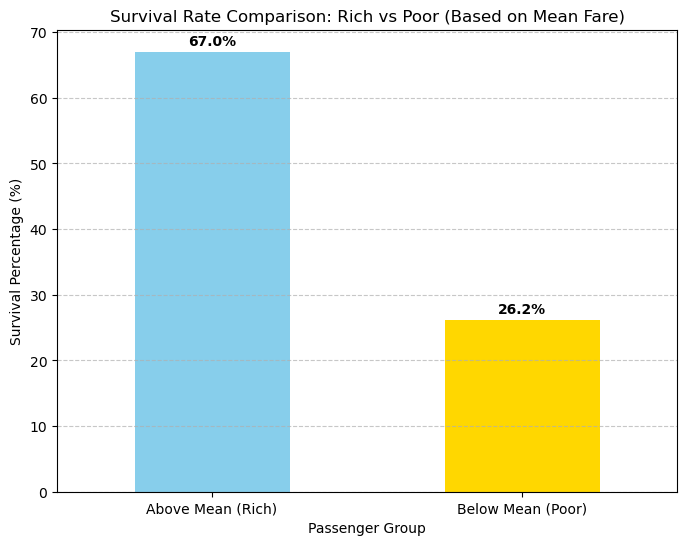

In [13]:

# Fares: typically a few very high ones and many low ones (log-normal)
mean_fare = data['Fare'].mean()
fares = np.array(data['Fare'])
# Survival Logic: High fare = higher survival probability
def simulate_survival(fare, mean):
    if fare > mean:
        return np.random.choice([1, 0], p=[0.65, 0.35]) # 65% survival for "rich"
    else:
        return np.random.choice([1, 0], p=[0.25, 0.75]) # 25% survival for "poor"

survived = [simulate_survival(f, mean_fare) for f in fares]

df = pd.DataFrame({'Fare': fares, 'Survived': survived})

# 2. Categorize based on Mean Fare
df['Fare Category'] = np.where(df['Fare'] > mean_fare, 'Above Mean (Rich)', 'Below Mean (Poor)')

# 3. Calculate Percentages
survival_stats = df.groupby('Fare Category')['Survived'].value_counts(normalize=True).unstack() * 100
survival_stats.columns = ['Did Not Survive %', 'Survived %']

# Print the results for verification
print(f"Mean Fare: R{mean_fare:.2f}")
print("\nSurvival Statistics by Fare Category:")
print(survival_stats)

# 4. Visualization
plt.figure(figsize=(8, 6))
# Plotting the Survived % in a bar chart
survival_stats['Survived %'].plot(kind='bar', color=['skyblue', 'gold'])
plt.title('Survival Rate Comparison: Rich vs Poor (Based on Mean Fare)')
plt.ylabel('Survival Percentage (%)')
plt.xlabel('Passenger Group')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add text labels on bars
for i, v in enumerate(survival_stats['Survived %']):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontweight='bold')

plt.savefig('survival_fare_comparison.png')